In [42]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [2]:
mainpath1 = "C:/Users/mromo/Desktop/Rappi/Datasets/Reports/Info Flota.csv"
mainpath2 = "C:/Users/mromo/Desktop/Rappi/Datasets/S41/Data/Info Conexion.csv"
mainpath3 = "C:/Users/mromo/Desktop/Rappi/Datasets/Reports/Info Deuda.csv"

In [3]:
df1 = pd.read_csv(mainpath1, parse_dates = ['REGISTRO'])
df2 = pd.read_csv(mainpath2)
df5 = pd.read_csv(mainpath3)

In [4]:
df5['deuda'] = df5['deuda'].apply(lambda x: x*-1)

In [5]:
df1.columns

Index(['SKID', 'NIVEL', 'SKNAME', 'IDENTIFICATION', 'BIRTHDAY', 'IS_ACTIVE',
       'CASTIGO', 'DIAS_RESTANTES', 'CONECTADO', 'REGISTRO', 'ULT_CONEXION',
       'TELEPHONE', 'CIUDAD', 'TRANSPORT_MEDIA_TYPE', 'HAS_DELIVERY_KIT',
       'DELIVERY_KIT_SIZE', 'POS_TERMINAL', 'DEUDA', 'PRIMER_PEDIDO',
       'PEDIDOS_HOY', 'PEDIDOS_ULT_7_DIAS', 'PEDIDOS_ESTA_SEMANA',
       'PEDIDOS_MES_PASADO', 'PEDIDOS_TOTALES', 'LIBERADAS_POR_RT',
       'LIBERADAS_POR_SOPORTE', 'LIBERADAS_POR_RT_30_DIAS',
       'LIBERADAS_POR_RT_7_DIAS', 'LIBERADAS_POR_SOPORTE_30_DIAS',
       'LIBERADAS_POR_SOPORTE_7_DIAS'],
      dtype='object')

In [6]:
df2.columns

Index(['skid', 'fecha', 'hora', 'time', 'orders', 'ganancia', 'tenia_cupo'], dtype='object')

In [7]:
df5.columns

Index(['storekeeper_id', 'deuda'], dtype='object')

In [8]:
df_deuda = df1.loc[:,['SKID', 'REGISTRO']]

In [9]:
df1 = df1[df1['REGISTRO']=='2018-10-10']

In [10]:
ids = df1['SKID'].tolist()

In [11]:
df3 = df2[df2['skid'].isin(ids)]

In [12]:
dfstats = pd.DataFrame(df3.groupby('skid').orders.sum())

,orders
count,32
mean,24
std,20
min,0
25%,10
50%,21
75%,38
max,75


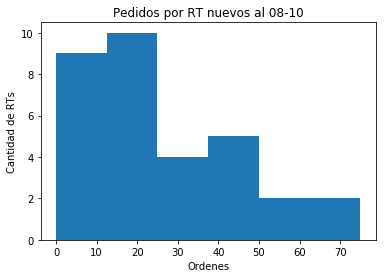

In [63]:
x = dfstats['orders'].count()
y = int(np.ceil(1+np.log2(x)))
plt.hist(dfstats['orders'], bins = y)
plt.xlabel('Ordenes')
plt.ylabel('Cantidad de RTs')
plt.title("Pedidos por RT nuevos al 08-10")
plt.savefig ("C:/Users/mromo/Desktop/Rappi/Datasets/Reports/Reporte Pedidos RT Nuevos.jpeg")
dfstats.describe().astype(int)

In [62]:
np.ceil(1+np.log2(x))

6.0

In [14]:
dfinc = df3[df3['fecha']<='2018-10-11']

In [15]:
df_inc = pd.DataFrame(dfinc.groupby('skid', ).orders.sum())

In [16]:
df_inc

,orders
skid,
12512,15.0
12514,7.0
12515,0.0
12516,15.0
12517,1.0
12518,13.0
12519,0.0
12520,16.0
12521,4.0


In [17]:
dfveh = df1.loc[:,['SKID', 'TRANSPORT_MEDIA_TYPE']]
dfveh = dfveh.rename(columns= {'SKID':'skid'})

In [18]:
df_final = pd.merge(df_inc, dfveh, how = 'inner', on = 'skid')

In [19]:
def createDummies(df,var_name):
    dummy = pd.get_dummies(df[var_name], prefix = var_name)
    df = df.drop(var_name, axis=1)
    df = pd.concat([df,dummy], axis =1)
    return df

In [20]:
df_final2 = createDummies(df_final, 'TRANSPORT_MEDIA_TYPE')

In [21]:
df_final2.insert(4,'Glosa','Incentivo Nuevos RTs Capacitados')
df_final2.insert(5,'Incentivo',0)

In [22]:
% matplotlib inline

,SKID,deuda
count,1124,1124
mean,11349,63878
std,838,73950
min,48,-134366
25%,10715,11700
50%,11378,33715
75%,12027,99798
max,12669,421679


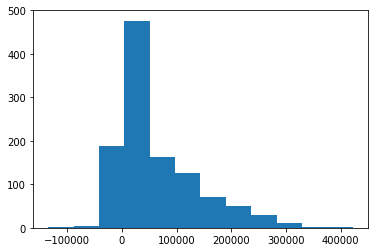

In [64]:
x = df5['deuda'].count()
y = int(np.ceil(1+np.log2(x)))
plt.hist(df5['deuda'], bins = y)
plt.savefig ("C:/Users/mromo/Desktop/Rappi/Datasets/Reports/Reporte Deuda Colectiva.jpeg")
df5.describe().astype(int)

In [24]:
df_final2.to_excel("C:/Users/mromo/Desktop/Rappi/Datasets/Reports/Incentivo Nuevos.xlsx")

In [25]:
df5 = df5.rename(columns = {'storekeeper_id':'SKID'})

In [26]:
data = pd.merge(df5,df_deuda, how='inner', on= 'SKID')

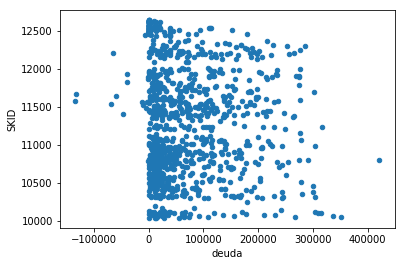

In [29]:
data.plot(kind = 'scatter', x = "deuda", y = "SKID")
plt.savefig ("C:/Users/mromo/Desktop/Rappi/Datasets/Reports/Scatter - Deuda vs ID.jpeg")